**Classifier 1:**

Accuracy: 0.25

Precision: 0.0625

Recall: 1

F1-Score: 0.118


**Classifier 2:**

Accuracy: 

Precision: 0.4

Recall: 0.8

F1-Score: 0.533

# Evaluating Classifiers

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier

In [9]:
# Read the data
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
# Split the data into X and y
y = df['Survived']
X = pd.concat([df.iloc[:,0], df.iloc[:,2:]], axis=1)
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
# Split the data into train and test set
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape, X_test.shape

((712, 11), (179, 11))

In [21]:
y_train.shape, y_test.shape

((712,), (179,))

In [22]:
# Build the classifier
dummy_clf = DummyClassifier(strategy='most_frequent') #dummy classifier always predicts dead in this case

In [23]:
dummy_clf.fit(X_train, y_train) #dummy classifier must also be fitted

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [24]:
dummy_clf.score(X_train, y_train) #accuracy that is achieved by dummy classifier

0.6151685393258427

In [25]:
# Build a simple logistic regression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()

In [52]:
# Fit model to train data (model parameters are estimated)
lr_clf.fit(X_train[['Pclass']], y_train) #dataframe must be put in as X (double brackets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Have a look at the classifier
lr_clf.score(X_train[['Pclass']], y_train)

0.6839887640449438

In [55]:
# a and b coefficients that were estimated
lr_clf.coef_, lr_clf.intercept_

(array([[-0.86852891]]), array([1.48869744]))

## 1) Accuracy

The first and easiest way to evaluate a classifier is the **accuracy**. It measures which ratio of the observations you classified correctly.

$\texttt{accuracy}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} 1(\hat{y}_i = y_i)$

where

$1(\hat{y}_i = y_i) = 
\begin{cases}
    1,& \text{if } \hat{y}_i = y_i\\
    0,              & \text{otherwise}
\end{cases}$

In [29]:
from sklearn.metrics import accuracy_score

In [31]:
y_pred_dummy = dummy_clf.predict(X_train)
#y_pred_dummy

In [34]:
y_pred_lr = lr_clf.predict(X_train[['Pclass']])
#y_pred_lr

In [37]:
accuracy_score(y_train, y_pred_dummy)

0.6151685393258427

In [36]:
accuracy_score(y_train, y_pred_lr)

0.6839887640449438

Is accuracy always a good metric to evaluate your classification?

- If the sample size of the different categories is very imbalanced, accuracy will naturally favor classifiers that just predict the majority class
- You may have different preferences for different types of missclassification. Accuracy does not tell you anything about the type of error you are making.

## 2) Types of Errors and the Confusion Matrix

**False Positive:**<br>
An observation is classified as positive, although it truly is negative

**False Negatives:**<br>
An observation is classified as negative, although it truly is positive

You can plot the different types of errors in a **confusion matrix**.

In [38]:
from sklearn.metrics import plot_confusion_matrix

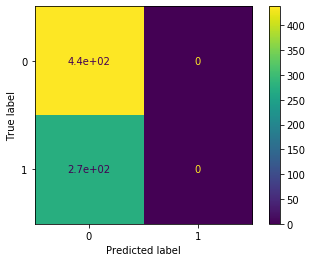

In [39]:
plot_confusion_matrix(dummy_clf, X_train, y_train) #parse in estimator (dummy_clf, lf_clf)

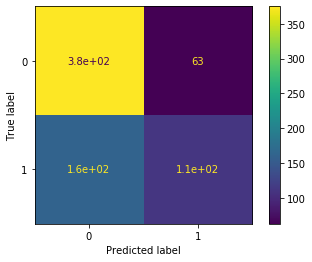

In [40]:
plot_confusion_matrix(lr_clf, X_train[['Pclass']], y_train) #parse in estimator (dummy_clf, lf_clf)

## 3) Precision

$precision = \frac{TP}{TP + FP}$

In [41]:
from sklearn.metrics import precision_score

In [42]:
precision_score(y_train, y_pred_dummy) #division by 0... Warning.

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [48]:
precision = precision_score(y_train, y_pred_lr)
precision

0.64

## 4) Recall

$recall = \frac{TP}{TP + FN}$

In [44]:
from sklearn.metrics import recall_score

In [45]:
recall_score(y_train, y_pred_dummy)

0.0

In [49]:
recall = recall_score(y_train, y_pred_lr)
recall

0.40875912408759124

## 5) F1-Score

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

In [51]:
F1 = (precision * recall) / (precision + recall)
F1

0.24944320712694878